In [5]:
from urllib import request
import re
import pandas as pd
import moment
import matplotlib.pyplot as plt
import numpy as np
from LinRegFuat import *
%matplotlib inline



In [6]:
url = "https://www.tradingview.com/chart/HAL/7lysX40q-HALIBURTON-SUPPORT-ANALYSIS/"

req = request.urlopen(url)
read = req.read().decode('utf-8')
read = read.split("\&#34;data\&#34;:[{\&#34;value\&#34;:")[1]
result = re.findall('\[(.*?)\]', read)
df = pd.DataFrame(columns=['timestamp','open','high','low','close','volume'])

for i in range(len(result)): 
    splitted = result[i].split(",")
    if splitted[0].isnumeric() == False:
        break
        
    df.at[i,"timestamp"] = moment.unix(int(splitted[0]), utc=True).format("YYYY-MM-DD HH:mm:ss")
    df.at[i,"open"] = float(splitted[1])
    df.at[i,"high"] = float(splitted[2])
    df.at[i,"low"] = float(splitted[3])
    df.at[i,"close"] = float(splitted[4])
    df.at[i,"volume"] = int(splitted[5])
    
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["day"] = df["timestamp"].apply(lambda x : x.date())
df["hour"] = df["timestamp"].apply(lambda x : x.time())


df = df[["day","hour","open","high","low","close","volume"]]
df.dropna(inplace=True)
df = df.iloc[1633:2156]
df.reset_index(inplace=True,drop=True)
df["day"] = pd.to_datetime(df["day"])
df.to_csv("homework2-Haliburton-Stock-Analysis.csv")
df.head()


,day,hour,open,high,low,close,volume
0,2012-06-22,13:30:00,28.63,28.63,27.8,27.8,23613584
1,2012-06-25,13:30:00,27.4,27.46,26.55,26.98,18809056
2,2012-06-26,13:30:00,27.01,27.02,26.28,26.7,19011808
3,2012-06-27,13:30:00,26.86,27.36,26.61,27.21,19014352
4,2012-06-28,13:30:00,27.36,27.8,27.09,27.69,15981590


Standard Error:  3.016499769751611
Estimated coefficients:  27.535292632346987 - 0.07111299365788666


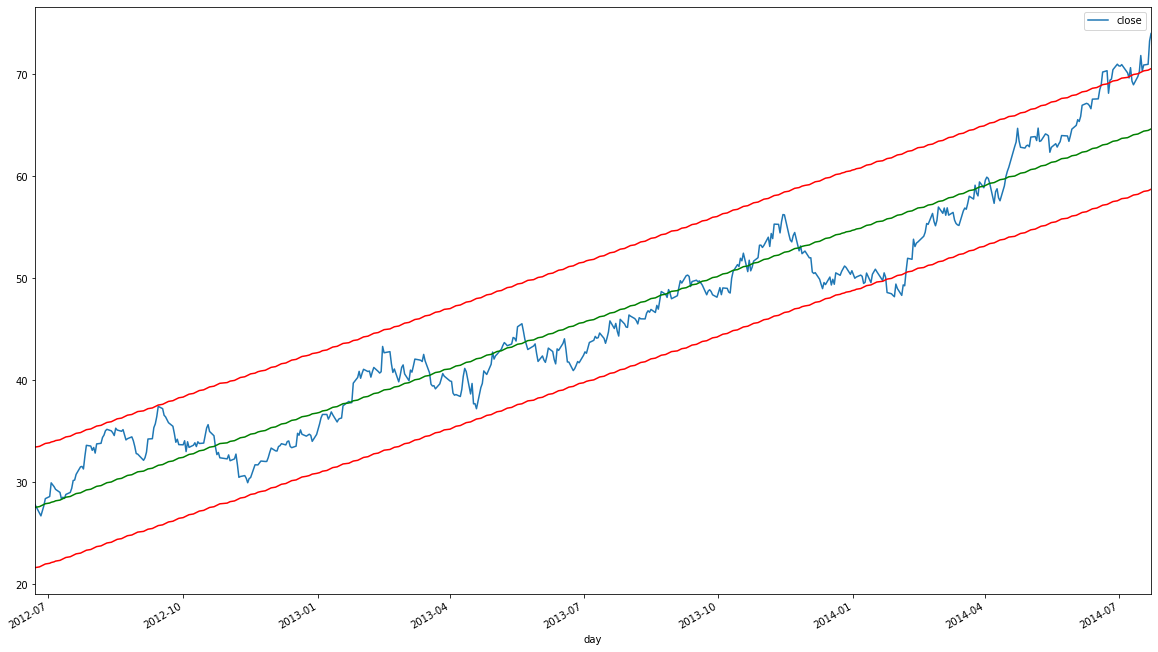

In [7]:
x = df.index 
y = df['close']
linregfuat = linear_regression_fuat(x,y)
est_1 = linregfuat[1]
est_2 = linregfuat[2]
y_pred = linregfuat[0]

standard_error = linregfuat[4]
print("Standard Error: ", standard_error)

df.plot(x="day",y="close",figsize=(20,12))
plt.plot(df.day, y_pred, color = "g") 
plt.plot(df.day, y_pred + standard_error*1.96, color = "r")
plt.plot(df.day, y_pred - standard_error*1.96, color = "r")
print("Estimated coefficients:  {} - {}".format(est_1, est_2)) 
plt.figsize = (12,12)
plt.show()


In [4]:
len(df)

523